In [1]:
import pickle
import pydeck
import pandas as pd
import numpy as np
import requests
import json

In [2]:
DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
LAND_COVER = [[[-123.0, 49.196], [-123.0, 49.324], [-123.306, 49.324], [-123.306, 49.196]]]

INITIAL_VIEW_STATE = pydeck.ViewState(
  latitude=49.254,
  longitude=-123.13,
  zoom=11,
  max_zoom=16,
  pitch=45,
  bearing=0
)

polygon = pydeck.Layer(
    'PolygonLayer',
    LAND_COVER,
    stroked=False,
    # processes the data as a flat longitude-latitude pair
    get_polygon='-',
    get_fill_color=[0, 0, 0, 20]
)

geojson = pydeck.Layer(
    'GeoJsonLayer',
    DATA_URL,
    opacity=0.8,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation='properties.valuePerSqm / 20',
    get_fill_color='[255, 255, properties.growth * 255]',
    get_line_color=[255, 255, 255],
    pickable=True
)

r = pydeck.Deck(
    layers=[polygon, geojson],
    initial_view_state=INITIAL_VIEW_STATE)

r.to_html()

In [3]:
objectIds = '55'
time = ''
geometry = ''
geometryType = 'esriGeometryPolygon' #'esriGeometryEnvelope'
inSR = ''
spatialRel = 'esriSpatialRelIntersects'
distance = ''
unit = 'esriSRUnit_Meter' #''esriSRUnit_Foot'
relationParam = ''
outFields = ''
returnGeometry = 'true'
maxAllowableOffset = ''
geometryPrecision = ''
outSR = ''
gdbVersion = ''
historicMoment = ''
returnDistinctValues = 'false'
returnIdsOnly = 'false'
returnCountOnly = 'false'
returnExtentOnly = 'false'
orderByFields = ''
groupByFieldsForStatistics = ''
outStatistics = ''
returnZ = 'false'
returnM = 'false'
multipatchOption = 'xyFootprint'
resultOffset = ''
resultRecordCount = ''
returnTrueCurves = 'false'
sqlFormat = 'none'
f = 'pjson'

url_adress = f'https://ge.ch/sitgags3/rest/services/Hosted/CAD_BATI3D_BASE/FeatureServer/0/query?where=&objectIds={objectIds}&time={time}&geometry={geometry}&geometryType={geometryType}&inSR={inSR}&spatialRel={spatialRel}&distance={distance}&units={unit}&relationParam={relationParam}&outFields={outFields}&returnGeometry={returnGeometry}&maxAllowableOffset={maxAllowableOffset}&geometryPrecision={geometryPrecision}&outSR={outSR}&gdbVersion={gdbVersion}&historicMoment={historicMoment}&returnDistinctValues={returnDistinctValues}&returnIdsOnly={returnIdsOnly}&returnCountOnly={returnCountOnly}&returnExtentOnly={returnExtentOnly}&orderByFields={orderByFields}&groupByFieldsForStatistics={groupByFieldsForStatistics}&outStatistics={outStatistics}&returnZ={returnZ}&returnM={returnM}&multipatchOption={multipatchOption}&resultOffset={resultOffset}&resultRecordCount={resultRecordCount}&returnTrueCurves={returnTrueCurves}&sqlFormat={sqlFormat}&f={f}'

In [6]:
all_data = list()
for objectIds in range(0,9999):
    try:
        url_adress = f'https://ge.ch/sitgags3/rest/services/Hosted/CAD_BATI3D_BASE/FeatureServer/0/query?where=&objectIds={objectIds}&time={time}&geometry={geometry}&geometryType={geometryType}&inSR={inSR}&spatialRel={spatialRel}&distance={distance}&units={unit}&relationParam={relationParam}&outFields={outFields}&returnGeometry={returnGeometry}&maxAllowableOffset={maxAllowableOffset}&geometryPrecision={geometryPrecision}&outSR={outSR}&gdbVersion={gdbVersion}&historicMoment={historicMoment}&returnDistinctValues={returnDistinctValues}&returnIdsOnly={returnIdsOnly}&returnCountOnly={returnCountOnly}&returnExtentOnly={returnExtentOnly}&orderByFields={orderByFields}&groupByFieldsForStatistics={groupByFieldsForStatistics}&outStatistics={outStatistics}&returnZ={returnZ}&returnM={returnM}&multipatchOption={multipatchOption}&resultOffset={resultOffset}&resultRecordCount={resultRecordCount}&returnTrueCurves={returnTrueCurves}&sqlFormat={sqlFormat}&f={f}'
        url = requests.get(url_adress)
        data = json.loads(url.text)
        all_data.append(data)
        # print(objectIds)
    except Exception as e:
        print(e)
        
#with open('db_p3.pickle', 'wb') as handle:
#    pickle.dump(all_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import requests
import json
import pandas as pd

print(url_adress)
url = requests.get(url_adress)
data = json.loads(url.text)
data

In [ ]:
#

https://epsg.io/transform#s_srs=2056&t_srs=4326&x=2499576.1866250&y=1122416.5378750

In [10]:
def epsg_api(x, y , z=0, s_srs='2056', t_srs='4326', return_z=False):
    callback = 'jsonpFunction'
    url = f'http://epsg.io/trans?x={x}&y={y}&z={z}&s_srs={s_srs}&t_srs={t_srs}&callback={callback}'
    response = requests.get(url)
    data = json.loads(response.text[14:-1])
    if return_z:
        return([float(data['x']), float(data['y']), float(data['z'])])
    else:
        return([float(data['x']), float(data['y'])])
    
def transform(coordinates):
    coordinates = coordinates[0]
    new_coordiantes = [epsg_api(x[0], x[1]) for x in coordinates]
    return([new_coordiantes])

In [7]:
with open('db_p3.pickle', 'rb') as handle:
    data_all = pickle.load(handle)
    
coordinates = [{'coordinates':x['features'][0]['geometry']['rings']} for x in data_all if x['features']]

In [9]:
# coordinates

In [16]:
import geopandas as gpd

In [38]:
any([len(building['features']) > 1 for building in data_all])

False

In [57]:
features = []
for building in data_all:
    if len(building['features']) == 0:
        continue
    building_feat = building['features'][0]
    out = {
    'properties': building_feat['attributes'],
    'geometry': {
        "type": "Polygon",
        "coordinates": building_feat['geometry']['rings']
        }
    }
    features.append(out)

In [58]:
# features

In [59]:
# data_all
geojson_dict = {
    
    "type": "FeatureCollection",
    "features": features
}



In [50]:
# geojson_dict

In [63]:
buildings_df = gpd.GeoDataFrame.from_features(geojson_dict, crs=2056)

In [53]:
# %debug

In [67]:
buildings_df = buildings_df.to_crs(4326)

<AxesSubplot:>

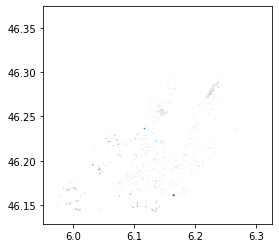

In [69]:
buildings_df.plot()

In [66]:
from pyproj import Transformer

In [14]:
proj_transformer = Transformer.from_crs(2056, 4326)

In [15]:
proj_transformer.transform(2499719.3260000013, 1123293.9069999978)

(46.25358055037119, 6.138179689982348)

In [82]:
INITIAL_VIEW_STATE = pydeck.ViewState(
  latitude=46.24,
  longitude=6.2,
  zoom=11,
  max_zoom=16,
  pitch=45,
  bearing=0
)

# polygon_layer = pdk.Layer(
#     "PolygonLayer",
#     buildings_df,
#     id="new_coordinates",
#     opacity=0.8,
#     stroked=False,
#     get_polygon="new_coordinates",
#     filled=True,
#     extruded=True,
#     wireframe=True,
#     get_elevation=300,
#     get_fill_color=[255, 255, 255],
#     get_line_color=[255, 255, 255],
#     auto_highlight=True,
#     pickable=True,
# )


geopandas_layer= pydeck.Layer('GeoJsonLayer', data=buildings_df, get_fill_color=[255,255,255], pickable=True,)

r = pydeck.Deck(
    layers=[geopandas_layer],
    initial_view_state=INITIAL_VIEW_STATE)

# r.show()
r.to_html()

In [81]:
# geopandas_layer.

In [77]:
# import math

# import pandas as pd
# import pydeck as pdk

# # Load in the JSON data
# DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
# json = pd.read_json(DATA_URL)
# df = pd.DataFrame()

# # Custom color scale
# COLOR_RANGE = [
#     [65, 182, 196],
#     [127, 205, 187],
#     [199, 233, 180],
#     [237, 248, 177],
#     [255, 255, 204],
#     [255, 237, 160],
#     [254, 217, 118],
#     [254, 178, 76],
#     [253, 141, 60],
#     [252, 78, 42],
#     [227, 26, 28],
#     [189, 0, 38],
#     [128, 0, 38],
# ]

# BREAKS = [-0.6, -0.45, -0.3, -0.15, 0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.05, 1.2]


# def color_scale(val):
#     for i, b in enumerate(BREAKS):
#         if val < b:
#             return COLOR_RANGE[i]
#     return COLOR_RANGE[i]


# def calculate_elevation(val):
#     return math.sqrt(val) * 10


# # Parse the geometry out in Pandas
# df["coordinates"] = json["features"].apply(lambda row: row["geometry"]["coordinates"])
# df

coordinates
0     [[[-123.0249569, 49.240719], [-123.0241582, 49...
1     [[[-123.0713722, 49.2720583], [-123.069715, 49...
2     [[[-123.0716588, 49.2715175], [-123.0733174, 4...
3     [[[-123.0746276, 49.2715849], [-123.0758105, 4...
4     [[[-123.0753056, 49.2686511], [-123.0736492, 4...
...                                                 ...
4622  [[[-123.1124635, 49.2825274], [-123.1134798, 4...
4623  [[[-123.1208394, 49.2818661], [-123.1200652, 4...
4624  [[[-123.0512263, 49.2226261], [-123.0506408, 4...
4625  [[[-123.0794137, 49.2474319], [-123.0763577, 4...
4626  [[[-123.1022246, 49.2708267], [-123.1021318, 4...

[4627 rows x 1 columns]

In [72]:
geojson

{"@@type": "GeoJsonLayer", "data": "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json", "extruded": true, "filled": true, "getElevation": "@@=properties.valuePerSqm / 20", "getFillColor": "@@=[255, 255, properties.growth * 255]", "getLineColor": [255, 255, 255], "id": "522849c2-ee25-4874-aa01-c9fd746b5ded", "opacity": 0.8, "pickable": true, "stroked": false, "wireframe": true}